In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats

In [2]:
train = pd.read_csv("train.csv")
train = train[train.columns]
test = pd.read_csv("test.csv")
test = test[test.columns]
train_label = pd.read_csv("train_label.csv", header=None)
train['Total_booking'] = train_label
test_label = pd.read_csv("test_label.csv", header=None)
test['Total_booking'] = test_label

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [5]:
train.shape, test.shape

((8708, 10), (2178, 10))

In [6]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


# Correlation of Features with Target Variable
Features having positive correlation with target variables are temp, atemp, windspeed, workingday and two features are having negative correlation with target variable are holiday, humidity.
Here correlation is not much high with target variable as it is below 40.

In [7]:
corr = train.corr()["Total_booking"]
corr=corr[np.argsort(corr, axis=0)[::-1]]
corr=corr[~corr.index.isin(['Total_booking'])]
corr

temp          0.397456
atemp         0.392754
windspeed     0.092090
workingday    0.012285
holiday      -0.004391
humidity     -0.307982
Name: Total_booking, dtype: float64

# Heatmap of highly correlated features with respect to SalePrice

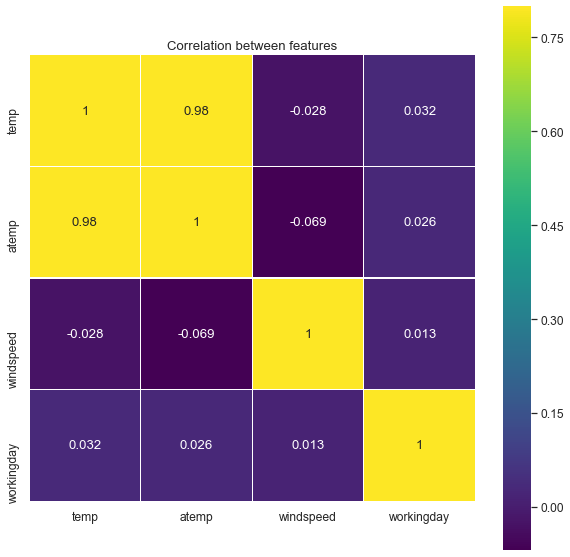

In [8]:
positive_correlated_variables = ['temp','atemp', 'windspeed','workingday']

corrMatrix = train[positive_correlated_variables].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='viridis', linecolor="white")

plt.title('Correlation between features');

# MultiCollinearity
From the above heatmap, we can see that some feature (other than our target variable Totak_booking) is highly correlated among themselves. Note the yellow blocks in the above heatmap. The following features are intercorrelated:
    
   temp <> atemp = 0.98
    
This type of scenario results in multicollinearity. Multicollinearity occurs when there is moderate or high intercorrelation between independent variables. This can result in high standard error.

There are different ways to reduce multicollinearity like: 
1. removing the interrelated features 
2. creating a new feature by combining the interrelated features.

Let's see these features relation to SalePrice in overall data:

Let's draw a scatter plot between Total_booking and some of the high correlated variables 
1. temp and atemp are correlated as stated above with 98%. Hence, we only take temp because it has higher correlation with Total_booking as compared to atemp.

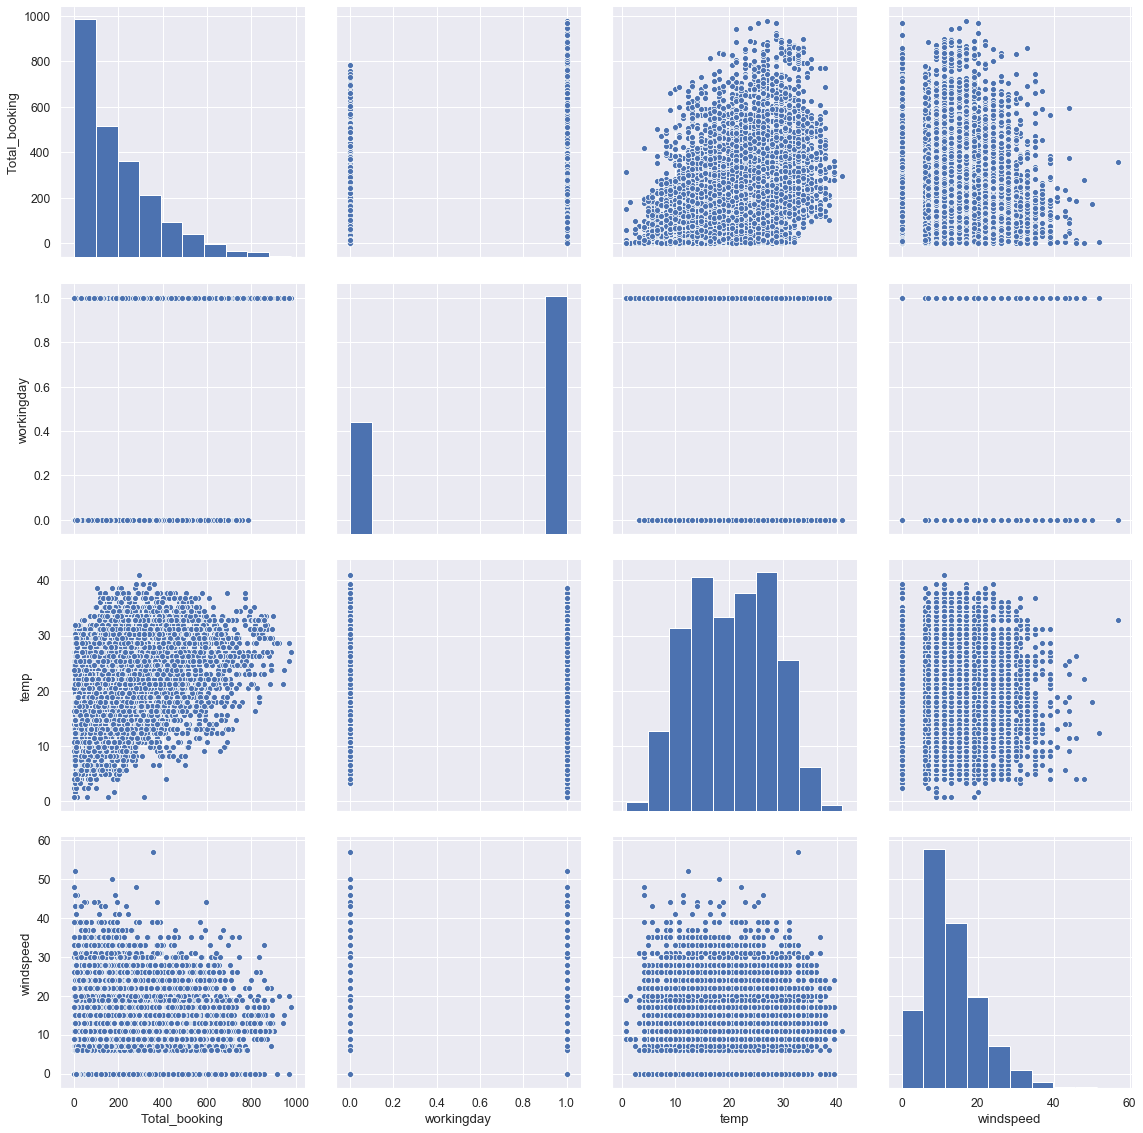

In [9]:
cols = ['Total_booking', 'workingday','temp','windspeed']
sns.pairplot(train[cols], height = 4.0)

From the above grapth it indicates that:
1. temp and Total_booking variables are positively related. When value of temp increases then Total_booking increases.
2. windspeed and Total_booking are negatively related. when windspeed increases the Total_booking decreases.

((array([-3.77627465, -3.5491955 , -3.42443716, ...,  3.42443716,
          3.5491955 ,  3.77627465]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (170.38058816724427, 193.00700505282495, 0.9381395805958506))

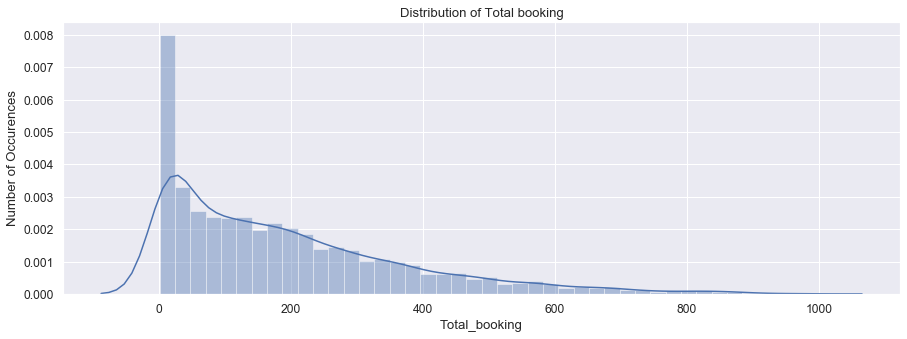

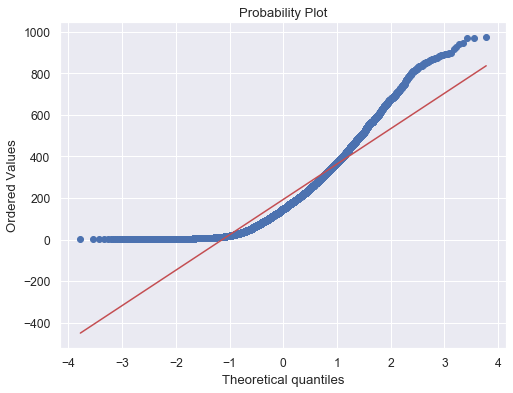

In [10]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['Total_booking'])
plt.title('Distribution of Total booking')
plt.xlabel('Total_booking')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['Total_booking'], plot=plt)

In [11]:
print("Skewness: %f" % train['Total_booking'].skew())
print("Kurtosis: %f" % train['Total_booking'].kurt())

Skewness: 1.237928
Kurtosis: 1.311722


From the above computation and also from the above histogram, we can say that *Total_booking*: 
- is positively skewed or right skewed 
- have high kurtosis

High Kurtosis means that *Total_booking* has some outliners. We need to remove them so that they don't affect our prediction result.

Text(0, 0.5, 'Number of Occurences')

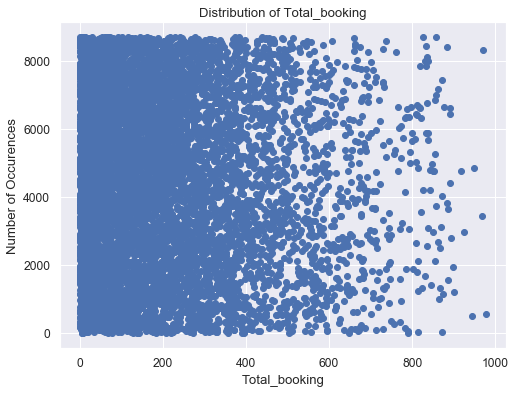

In [12]:
plt.figure(figsize=[8,6])
plt.scatter(train["Total_booking"].values, range(train.shape[0]))
plt.title("Distribution of Total_booking")
plt.xlabel("Total_booking");
plt.ylabel("Number of Occurences")

In [13]:
# removing outliers
upperlimit = np.percentile(train.Total_booking.values, 99.5)
train['Total_booking'].loc[train['Total_booking']>upperlimit] = upperlimit # slicing dataframe upto the uppperlimit

C:\Users\Raju\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


below is the scatter plot of Total_booking After Removing outliers.

Text(0, 0.5, 'Number of Occurences')

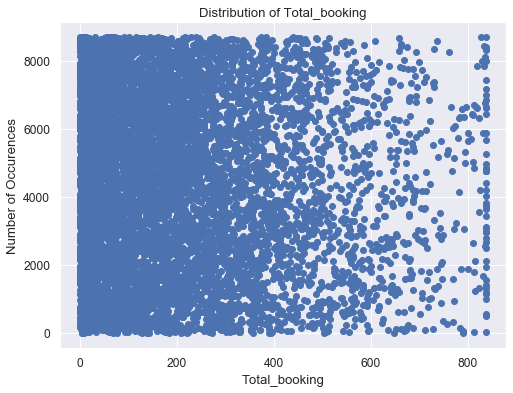

In [14]:
# plotting again the graph after removing outliers
plt.figure(figsize=[8,6])
plt.scatter(train["Total_booking"].values, range(train.shape[0]))
plt.title("Distribution of Total_booking")
plt.xlabel("Total_booking");
plt.ylabel("Number of Occurences")

In [15]:
# applying log transformation
train['Total_booking'] = np.log(train['Total_booking'])

((array([-3.77627465, -3.5491955 , -3.42443716, ...,  3.42443716,
          3.5491955 ,  3.77627465]),
  array([  1.,   1.,   1., ..., 837., 837., 837.])),
 (169.7129871375398, 192.79248966467614, 0.9386297926184874))

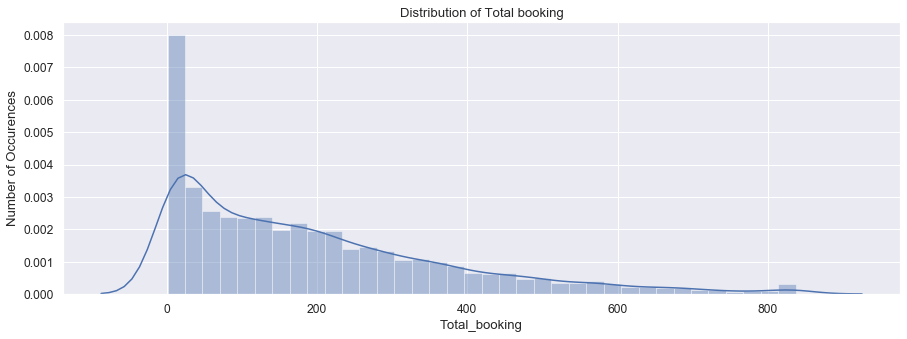

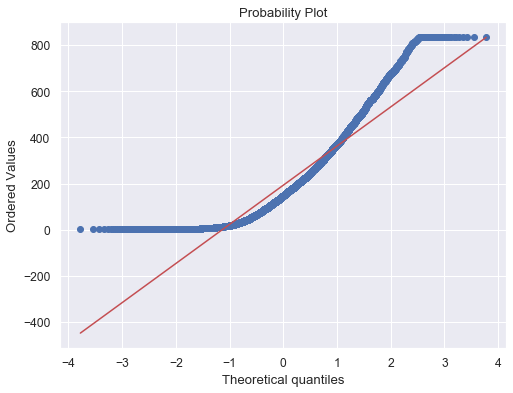

In [16]:
# histogram to graphically show skewness and kurtosis
plt.figure(figsize=[15,5])
sns.distplot(train['Total_booking'])
plt.title('Distribution of Total booking')
plt.xlabel('Total_booking')
plt.ylabel('Number of Occurences')

# normal probability plot
plt.figure(figsize=[8,6])
stats.probplot(train['Total_booking'], plot=plt)

In [17]:
# skewness and kurtosis
print("Skewness: %f" % train['Total_booking'].skew())
print("Kurtosis: %f" % train['Total_booking'].kurt())

Skewness: 1.207553
Kurtosis: 1.139839


After performinng Log transformation, the above histogram indicates that Total-booking is now become left skewed and resumes normal distribution to max extent and kurtosis values got reduced which means outliers are gor reduced.

# Getting Missing Values¶
Let's first concatenate train and test dataset into a single dataframe named all_data.

In [18]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Total_booking.values
y_test = test.Total_booking.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Total_booking'], axis=1, inplace=True)
all_data.shape

(10886, 9)

# Checking For Null in dataset:
Below code explains that there is no column having null values

In [19]:
total_null_columns = all_data.isnull().sum()
total_null_columns

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
datetime      10886 non-null object
season        10886 non-null object
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null object
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 765.5+ KB


# Reducing Skewness of Predictors (Independent Variables)
Earlier in this notebook, we have reduced the Skewness of our target variable Total_booking. We did it through Log Transformation. We will apply the same for all other numeric dependent variables having high skewness.
Let's check the Skewness of numeric dependent variables:

In [21]:
numeric_features = all_data.dtypes[all_data.dtypes != 'object'].index
#print (numeric_features)

skewness = []
for col in numeric_features:
    skewness.append( (col, all_data[col].skew()) )
    
pd.DataFrame(skewness, columns=('Feature', 'Skewness')).sort_values(by='Skewness', ascending=False)

,Feature,Skewness
0,holiday,5.660517
5,windspeed,0.588767
2,temp,0.003691
4,humidity,-0.086335
3,atemp,-0.102560
1,workingday,-0.776163


# Unskewing Data
We will use Log Transformation to reduce the Skewness of the positively skewed features.

In [22]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [23]:
positively_skewed_features = all_data[numeric_features].columns[abs(all_data[numeric_features].skew()) > 1]

# applying log transformation
for col in positively_skewed_features:
    all_data[col] = np.log(np.ma.array(all_data[col], mask=(all_data[col]<=0))) # using masked array to ignore log transformation of 0 values as (log 0) is undefined

C:\Users\Raju\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [ ]:
for column in cols:
    upperlimit = np.percentile(train[column].values, 99.5)
    lowerlimit = np.percentile(train[column].values, 0.5)
    train[column].loc[train[column]>upperlimit] = upperlimit
    train[column].loc[train[column]<lowerlimit] = lowerlimit

In [24]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,1.0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,1.0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,1.0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,1.0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,1.0,1,Clear + Few clouds,30.34,33.335,51,19.0012


# Creating Dummy Categorical Features

In [25]:
all_data = pd.get_dummies(all_data, columns=['season','weather'])
all_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012 19:00,1.0,1,22.14,25.760,77,16.9979,0,0,1,0,1,0,0,0
1,9/5/2012 4:00,1.0,1,28.70,33.335,79,19.0012,1,0,0,0,1,0,0,0
2,1/13/2011 9:00,1.0,1,5.74,6.060,50,22.0028,0,1,0,0,1,0,0,0
3,11/18/2011 16:00,1.0,1,13.94,16.665,29,8.9981,0,0,0,1,1,0,0,0
4,9/13/2011 13:00,1.0,1,30.34,33.335,51,19.0012,1,0,0,0,1,0,0,0


Dropping datetime features as this features makes not much diiference in predicting the target variable

In [26]:
all_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012 19:00,1.0,1,22.14,25.760,77,16.9979,0,0,1,0,1,0,0,0
1,9/5/2012 4:00,1.0,1,28.70,33.335,79,19.0012,1,0,0,0,1,0,0,0
2,1/13/2011 9:00,1.0,1,5.74,6.060,50,22.0028,0,1,0,0,1,0,0,0
3,11/18/2011 16:00,1.0,1,13.94,16.665,29,8.9981,0,0,0,1,1,0,0,0
4,9/13/2011 13:00,1.0,1,30.34,33.335,51,19.0012,1,0,0,0,1,0,0,0


# Getting new Train and Test dataset
We are done with Feature Engineering part. We will not split all_data into train and test dataset.

In [27]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [28]:
train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012 19:00,1.0,1,22.14,25.760,77,16.9979,0,0,1,0,1,0,0,0
1,9/5/2012 4:00,1.0,1,28.70,33.335,79,19.0012,1,0,0,0,1,0,0,0
2,1/13/2011 9:00,1.0,1,5.74,6.060,50,22.0028,0,1,0,0,1,0,0,0
3,11/18/2011 16:00,1.0,1,13.94,16.665,29,8.9981,0,0,0,1,1,0,0,0
4,9/13/2011 13:00,1.0,1,30.34,33.335,51,19.0012,1,0,0,0,1,0,0,0


In [29]:
test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
8708,5/10/2012 11:00,1.0,1,21.32,25.000,48,35.0008,0,0,1,0,1,0,0,0
8709,6/9/2012 7:00,1.0,0,23.78,27.275,64,7.0015,0,0,1,0,1,0,0,0
8710,3/6/2011 20:00,1.0,0,11.48,12.120,100,27.9993,0,1,0,0,0,0,1,0
8711,10/13/2011 11:00,1.0,1,25.42,28.790,83,0.0000,0,0,0,1,0,0,0,1
8712,6/2/2012 12:00,1.0,0,25.42,31.060,43,23.9994,0,0,1,0,1,0,0,0


In [30]:
X_train = train.drop(['datetime','atemp'], axis=1)
X_test = test.drop(['datetime','atemp'], axis=1)

In [31]:
X_train.head()

,holiday,workingday,temp,humidity,windspeed,season_Fall,season_Spring,season_Summer,season_Winter,weather_ Clear + Few clouds,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,1.0,1,22.14,77,16.9979,0,0,1,0,1,0,0,0
1,1.0,1,28.70,79,19.0012,1,0,0,0,1,0,0,0
2,1.0,1,5.74,50,22.0028,0,1,0,0,1,0,0,0
3,1.0,1,13.94,29,8.9981,0,0,0,1,1,0,0,0
4,1.0,1,30.34,51,19.0012,1,0,0,0,1,0,0,0


# Objective:
To test, tune and compare various regression models with minimal manual intervention in Python. The models included in this module are: Linear Regression Ridge Regression Lasso Regression K Nearest Neighbors Bayesian Ridge Decision Tree Regression Random Forest Bagging (Using decision tree by default) Gradient boosting XGBoost Support Vector Machines

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from scipy import stats
# accuracy testing
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Importing models

# linear models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import BayesianRidge

# non-parametric models
from sklearn.neighbors import KNeighborsRegressor

# Decision tree
from sklearn.tree import DecisionTreeRegressor

# Support vectr machine
from sklearn.svm import SVR

# ensemble models

# bagging
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# tree based boosting
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# stacking
from mlxtend.regressor import StackingRegressor
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Defining train and test data to train model

In [ ]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# RandomForest is the best model among all the regressor model which gave high accuracy compared to other models

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

In [ ]:
rf_test_pred=rf.predict(x_train)
r2sc_test = r2_score(y_train,rf_test_pred)
print(r2sc_test)

In [ ]:
rf2 = RandomForestRegressor()
rf2.fit(x_test,y_test)

In [ ]:
rf2_test_pred1=rf2.predict(x_test)
r2sc_test1 = r2_score(y_test,rf2_test_pred1)
print(r2sc_test1)

In [ ]:
param_grid_rf = {'bootstrap': [True, False],
                 'n_estimators': [1000]}

In [ ]:
rf1 = RandomForestRegressor(random_state=42)
model_grid = GridSearchCV(estimator = rf1, param_grid = param_grid_rf,n_jobs = -1, cv = 5, verbose = 2)
model_grid.fit(x_train,y_train)

In [ ]:
rf_test_pred_gs = model_grid.predict(x_test)
rf_r2sc_test_gs = r2_score(y_test,rf_test_pred_gs)
print(rf_r2sc_test_gs)